Extracting Data

In [13]:
import sklearn as skl
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [14]:

activities=["Walking","WalkingUp","WalkingDown","Sitting","Standing","Laying"]
initials=["w","wu","wd","si","st","l"]
dfs={}
y_test3=[]
for a in range(len(activities)):
    for i in range(4):
        filename = f"/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/Data Collection/{activities[a]}_{i+1}.csv"
        df=pd.read_csv(filename)
        dfs[f'{initials[a]}{i+1}'] = df
        y_test3.append(a+1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/Data Collection/Walking_1.csv'

Slicing out the first 5 seconds

In [ ]:
for i in dfs:
    dfs[i]=dfs[i].iloc[500:]

## Reducing frequencies from 100 Hz to 50 Hz

In [ ]:
for i in dfs:
    if len(dfs[i])%2!=0:
        dfs[i]=dfs[i].iloc[:-1]

In [ ]:
dfs_n={}
for i in dfs:
    df=dfs[i]
    df_n=pd.DataFrame()
    for j in range(0,len(df)-1,2):
        n_row=(df.iloc[j]+df.iloc[j+1])/2
        df_n=pd.concat([df_n,n_row.to_frame().T],ignore_index=True)
    dfs_n[f'{i}_n'] = df_n

Ttrimming the meaningful 10 secs of data at 50 Hz 

In [ ]:
dfs_t={}
df_l=[]
for i in dfs_n:
    dfs_n[i].drop(['time','atotal'],axis=1,inplace=True)
    dfs_t[f'{i}_t']=dfs_n[i].iloc[:500]
    df_l.append(dfs_t[f'{i}_t'])


In [ ]:
My_X_test=np.stack(df_l,axis=0)
print(My_X_test.shape)

(24, 500, 3)


# Questions

## 1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model.
 

In [ ]:
My_X_test_rs=My_X_test.reshape(24,1500)

### Using DT1

#### Using Gini

Accuracy :  0.20833333333333334
Precision :  0.18055555555555555
Recall :  0.20833333333333334


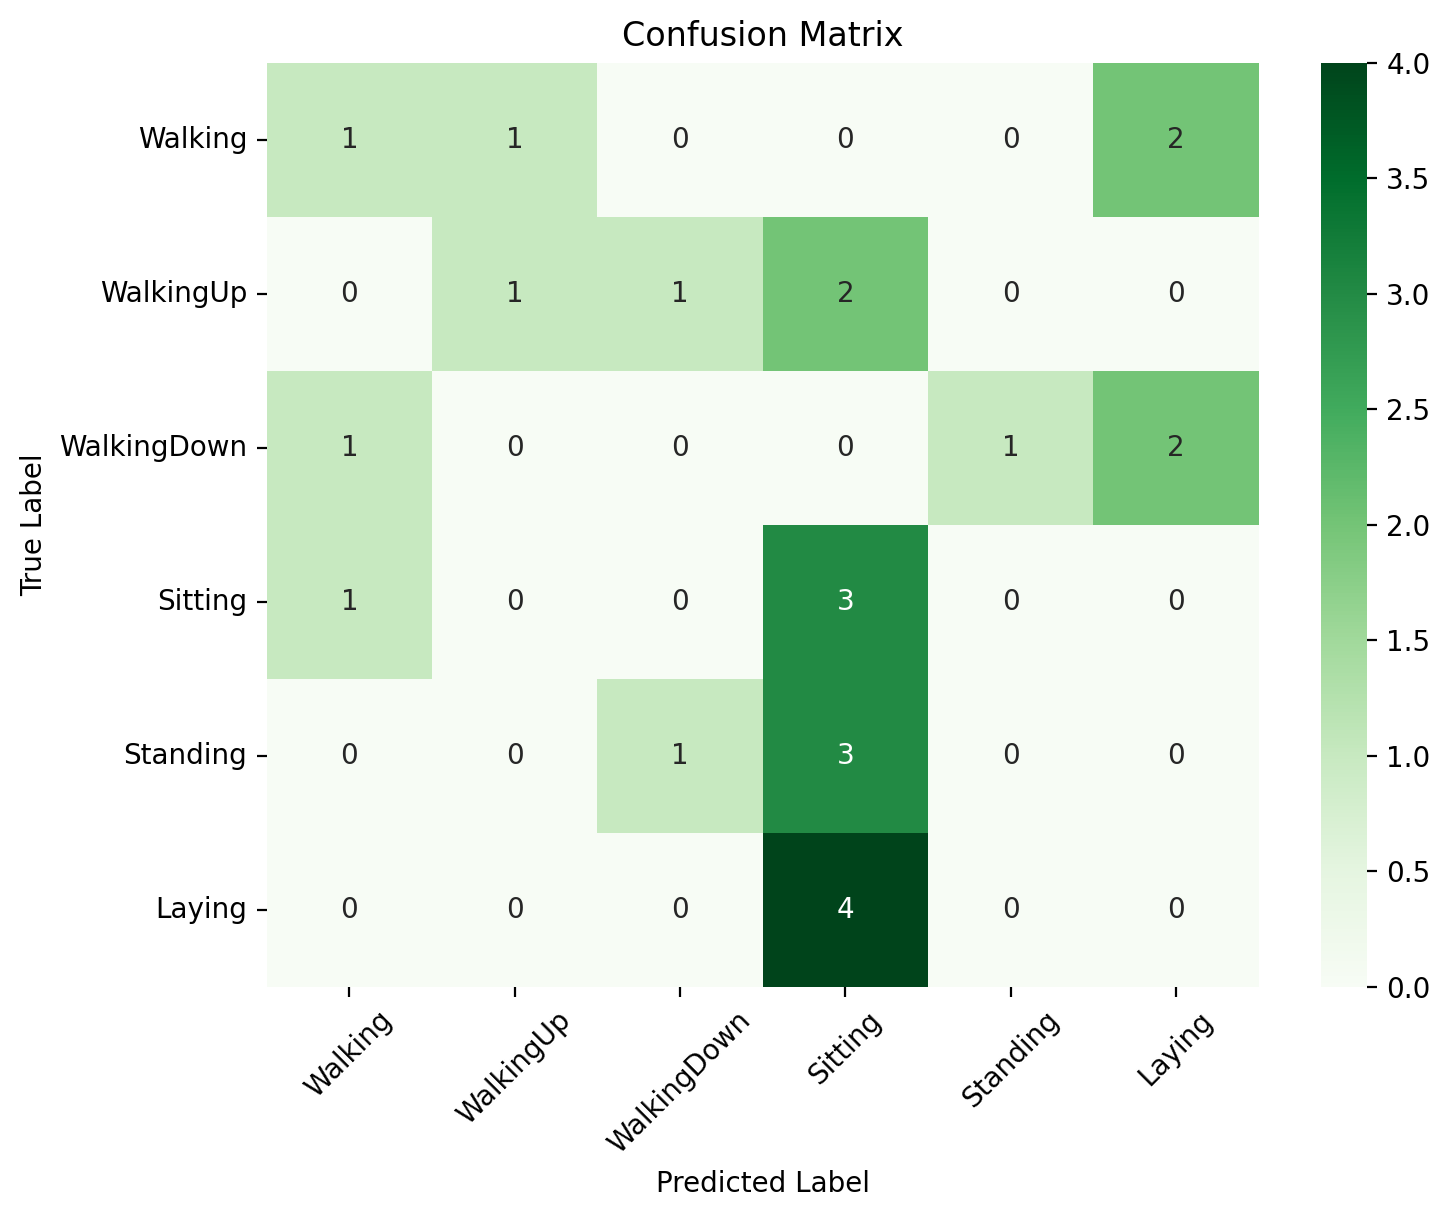

In [ ]:
dt2_g=joblib.load('/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/t2_dt1_g.pkl')
y_hat=dt2_g.predict(My_X_test_rs)
a=skl.metrics.accuracy_score(y_test3,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test3,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(y_test3,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(y_test3,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy :  0.16666666666666666
Precision :  0.11666666666666665
Recall :  0.16666666666666666


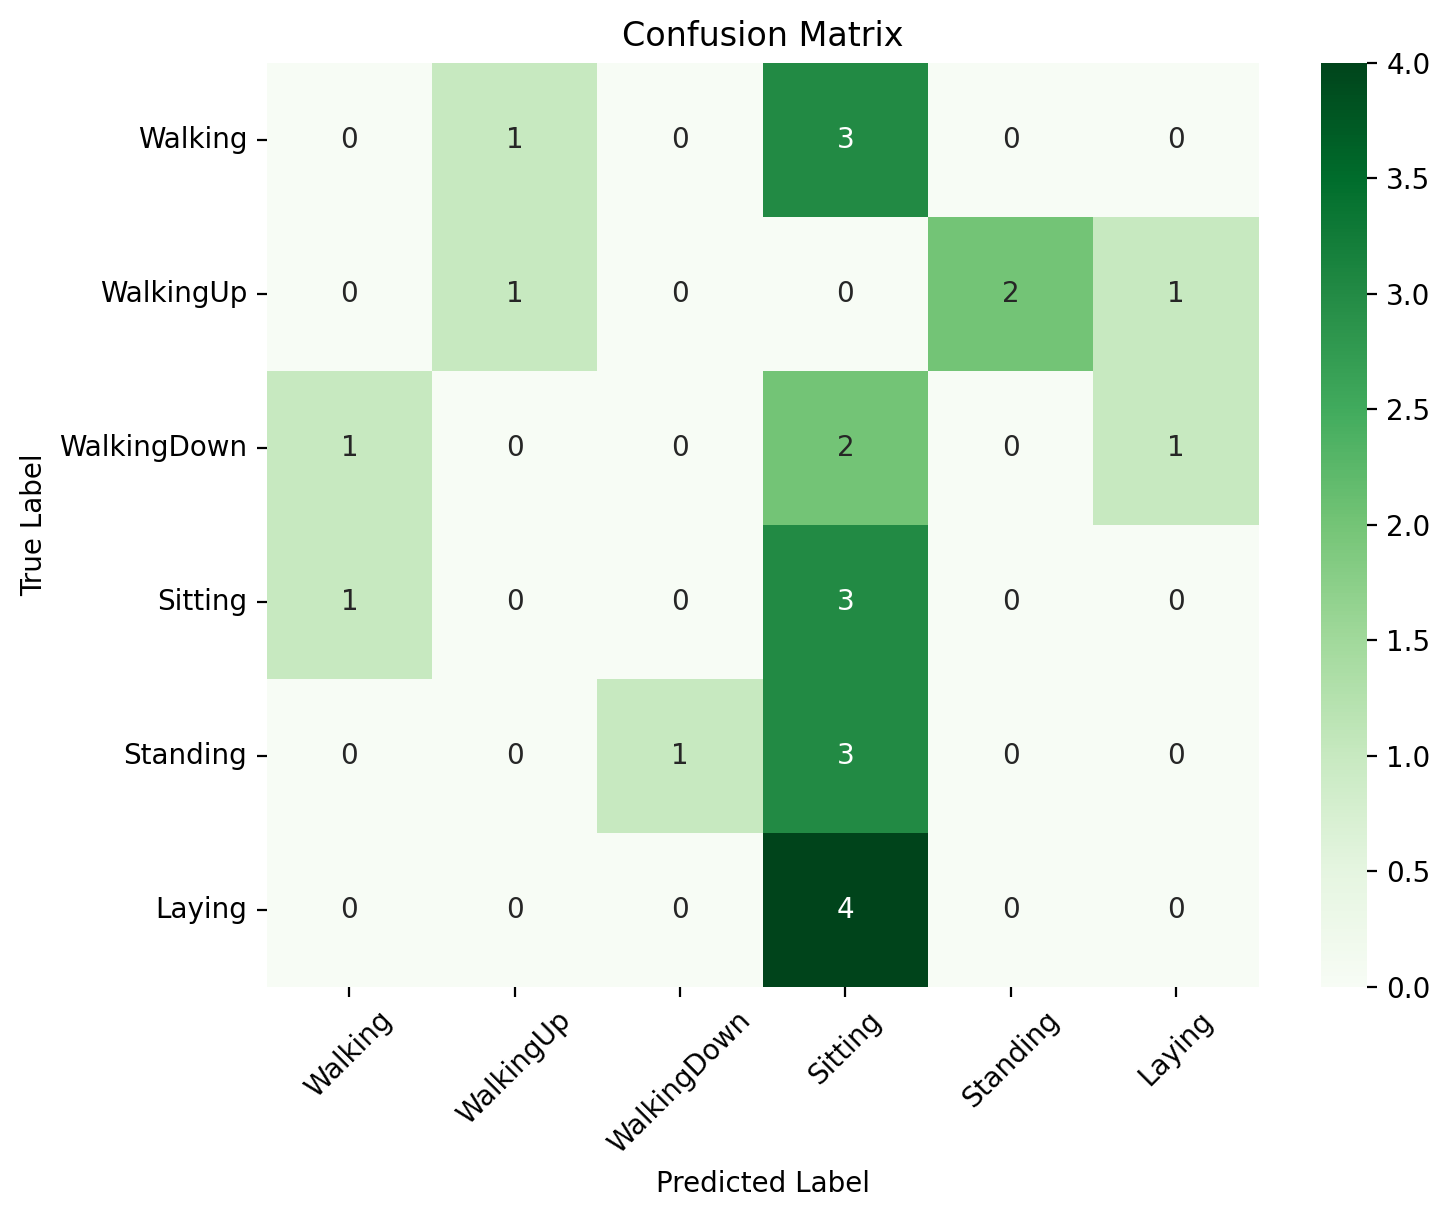

In [ ]:
dt2_g=joblib.load('/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/t2_dt1_e.pkl')
y_hat=dt2_g.predict(My_X_test_rs)
a=skl.metrics.accuracy_score(y_test3,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test3,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(y_test3,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(y_test3,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## How did the model perform? And which Model was used?

The model used was the Descision Tree 1 which was the model trained through the Raw data the reason being that the data collected by us has the same features(Acceleration in x,y and z directions).

The model performed very poorly.
the probable reasons for the poor performance are:
1. **Logistic Difference**: The data used for training the model is recorded in lab setting i.e. with proper accesories whereas the data collected by us is done by holding the phone in hand.
2. **Human Error**: as the phone was held in hands the vibration of hands might have disturbed the data resulting in confusing the model and misclassification.
3. **Elevation Difference**: The step size in the training data might be different compared the step size in the data collected which might lead to misclassification.

## 2.Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 marks]

The accuracy achieved on the decision tree through raw acceleration data is about 20% which is very low and it could be much more improved thus pre-processing and featurization is needed.

##